<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Crimes_na_Cidade_de_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Uma pesquisa realizada pela revista Veja em 19 de setembro de 2018 informou que 48% dos paulistanos já foram furtados ou roubados, de acordo com o Google a população de São Paulo em 2018 era de 12,18 milhões.

Devido ao alto índice de assaltos e furtos foi criado um site "ondefuiroubado.com.br" onde as pessoas relatavam os crimes ocorridos, com mais detalhes e informações.

Vamos analisar os dados extraidos do site no período de 2010 a 2018.

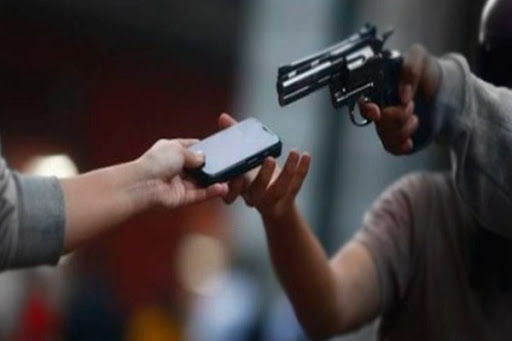

*Fontes:*

  https://vejasp.abril.com.br/cidades/violencia-sao-paulo-2018/

  https://bit.ly/3806Dth


# Importando Dataset

In [0]:
# instalar wordcloud
!pip install wordcloud -q

In [0]:
#Importando bibliotecas utilizadas
import pandas as pd
from google.colab import files
import io 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
#Importando dataset
n = files.upload()

Saving dataset-limpo.csv to dataset-limpo.csv


In [0]:
#definir dataset em uma variável
df = pd.read_csv(io.BytesIO(n['dataset-limpo.csv']))

# Análise Exploratória

## Verificando quantidade de dados que iremos trabalhar

In [100]:
#Analisar quantidade de entradas
print("Variáveis: {}".format(df.shape[1]))
print("Variáveis: {}".format(df.shape[0]))

Variáveis: 36
Variáveis: 12899


## Dicionário de Variáveis

**id** - Número de id gerado para identificar crime

**bairro** - Bairro onde ocorreiu o crime

**created_at** - Data e hora de input dos dados

**descricao** - Descrição do crime

**endereco** - Endereço do crime

**id.1** - não identificado

**ip_address_origin** - origem do endereço ip

**latitude** - Coordenada da latitude do local do crime

**longitude** - Coordenada da longitude do local do crime

**registrou_bo** - Informação de True para registrou B.O e False para não registrou

**sexo** - Sexo da vitima

**tipo_assalto_id** - Cod. para tipo do assalto

**titulo** - Título da ocorrência

**uri** - Uri de informações do crime

**user_id** - Identificação do usuário

**valor_prejuizo** - Valor monetário do prejuizo

**Bicicleta** - Valor True para roubo de bicicleta ou Nan para não aplicável

**Bolsa ou Mochila** - Valor True para roubo de bolsa ou mochila ou Nan para não aplicável

**Carteira** - Valor True para roubo de carteira ou Nan para não aplicável

**Cartão de Crédito** - Valor True para roubo de cartão de crédito ou Nan para não aplicável

**Celular** - Valor True para roubo de celular ou Nan para não aplicável

**Computador** - Valor True para roubo de computador ou Nan para não aplicável

**DVD** - Valor True para roubo de DVD ou Nan para não aplicável

**Dinheiro** - Valor True para roubo de dinheiro ou Nan para não aplicável

**Documentos** - Valor True para roubo de documentos ou Nan para não aplicável

**Equipamento de Som** - Valor True para roubo de equipamentos de som ou Nan para não aplicável

**Estepe** - Valor True para roubo de estepe ou Nan para não aplicável

**MP4 ou Ipod** - Valor True para roubo de MP4 ou Ipod ou Nan para não aplicável

**Móveis** - Valor True para roubo de móveios ou Nan para não aplicável

**Notebook** - Valor True para roubo de notebook ou Nan para não aplicável

**Outros** - Valor True para roubo de outros ou Nan para não aplicável

**Relógio** - Valor True para roubo de relógio ou Nan para não aplicável

**Som** - Valor True para roubo de som ou Nan para não aplicável

**Tablet** - Valor True para roubo de teblat ou Nan para não aplicável

**Tv** - Valor True para roubo de TV ou Nan para não aplicável

**time** - Data e hora do crime


## Analisando primeiras entradas

In [101]:
df.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa_ou_Mochila,Carteira,Cartão_de_Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento_de_Som,Estepe,MP4_ou_Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,0,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,60.0,NaN,True,True,NaN,True,NaN,True,True,NaN,True,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,1,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,1,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,0,5,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,NaN,2500.0,NaN,True,True,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,1,1,Arrombaram meu carro que estava no estacioname...,/denuncias/zD1lJa-arrombaram-meu-carro-que-est...,NaN,9999.0,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000


## Alterando nomes de colunas

In [0]:
df = df.rename(columns={'Bolsa ou Mochila' : 'Bolsa_ou_Mochila', 'Cartão de Crédito' : 'Cartão_de_Crédito',
                       'Equipamento de Som' : 'Equipamento_de_Som', 'MP4 ou Ipod' : 'MP4_ou_Ipod'})



## Verificação de valores Outliers

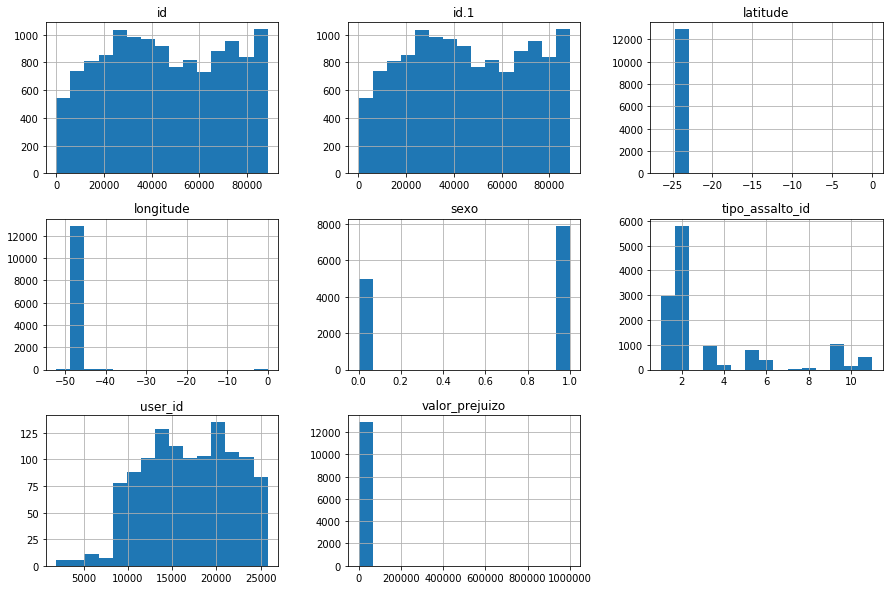

In [103]:
#Plotar histograma para analisar a distribuição dos valores
df.hist(bins=15, figsize=(15,10));

Dentre as variáveis apresentadas, a unica que teremos que analisar será a **valor_prejuizo** que aparenta ter valores outliers, iremos analisa-lá melhor:

In [104]:
#Resumo estatístico dos dados na coluna valor_prejuizo
df.valor_prejuizo.describe()

count      12899.000000
mean        2745.264592
std        11115.126241
min            0.000000
25%           25.000000
50%          700.000000
75%         2000.000000
max      1000000.000000
Name: valor_prejuizo, dtype: float64

Iremos limpando o dataset e analisar no gráfico de BoxPlot:

In [0]:
#Limpar entradas com valores acima de 10.000 de prejuizo
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.valor_prejuizo > 10000].index, axis=0, inplace=True)

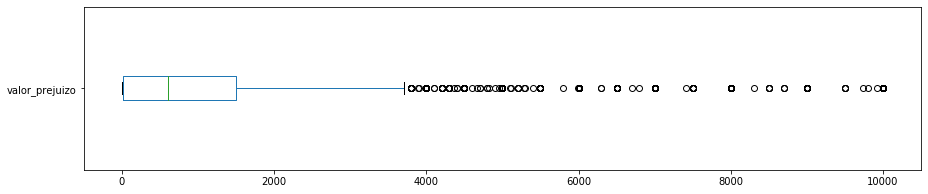

In [106]:
#Plotar gráfico BoxPlot para analisar os valores outliers
df_clean.valor_prejuizo.plot(kind='box', vert=False, figsize=(15, 3));


In [107]:
#Verificar quantidade de linhas retiradas do dataset
retirado_dataset = (df.shape[0] - df_clean.shape[0])
a = retirado_dataset / df_clean.shape[0]
print("Quantidade de entradas retiradas do dataset: {:.2%}".format(a))

Quantidade de entradas retiradas do dataset: 5.80%


In [108]:
#Resumo estatístico dos dados na coluna valor_prejuizo após limpeza dos dados outliers
df_clean.valor_prejuizo.describe()

count    12192.000000
mean      1254.041009
std       1848.865151
min          0.000000
25%         10.000000
50%        600.000000
75%       1500.000000
max      10000.000000
Name: valor_prejuizo, dtype: float64

## Analisando valores nulos no dataset

In [109]:
(df_clean.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Móveis                0.942631
DVD                   0.939298
Computador            0.938600
Som                   0.938445
Tv                    0.933561
Equipamento_de_Som    0.927514
Bicicleta             0.926506
Estepe                0.920304
Tablet                0.915575
MP4_ou_Ipod           0.906427
Notebook              0.894565
user_id               0.860222
Relógio               0.849136
Dinheiro              0.819598
Cartão_de_Crédito     0.745019
Documentos            0.683929
Bolsa_ou_Mochila      0.682999
Carteira              0.634003
Outros                0.581751
Celular               0.317234
bairro                0.125824
ip_address_origin     0.090085
registrou_bo          0.037910
descricao             0.000078
latitude              0.000000
created_at            0.000000
endereco              0.000000
id.1                  0.000000
time                  0.000000
longitude             0.000000
sexo                  0.000000
tipo_assalto_id       0.000000
titulo  

Dos valores acima, o unico que poderá interferir nos resultados é a coluna **bairro** com 12.58% das entradas sem preenchimento

# Retirando insights dos dados

## Quais os bairros com maior numero de crimes?

In [110]:
#Contando valores das entradas dentro da variável bairro
df_clean.bairro.value_counts()[:20]


São Paulo          605
Consolação         340
Vila Mariana       324
Bela Vista         315
Pinheiros          223
Ipiranga           195
Butantã            167
Liberdade          156
República          155
Rio Pequeno        135
Centro             132
Saúde              120
Itaim Bibi         117
Santana            117
Santo Amaro        108
Jardim Paulista    107
Jabaquara           97
Brás                96
Perdizes            88
Tatuapé             88
Name: bairro, dtype: int64

In [118]:
qtd_sp = (df_clean.bairro.value_counts()[:1] / df_clean.bairro.value_counts().sum())
print(qtd_sp)

São Paulo    0.057243
Name: bairro, dtype: float64


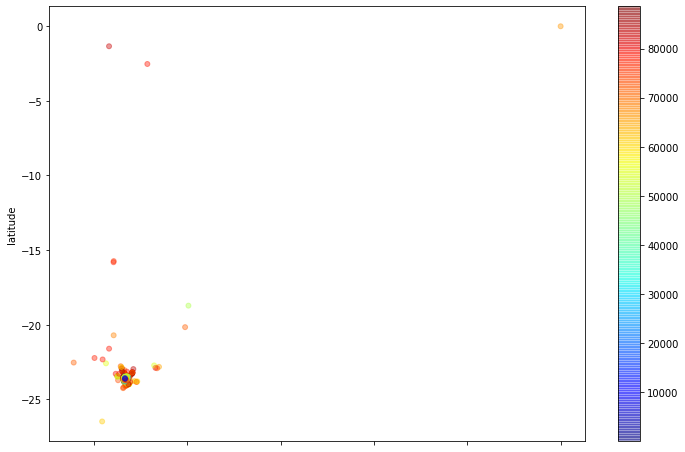

In [0]:
#Plotando gráfico de dispersão da longitude e latitude dos crimes
df_clean.plot(kind='scatter', x= 'longitude', y='latitude', alpha=0.4, c=df_clean['id'], s=25, cmap=plt.get_cmap('jet'), figsize=(12,8));


## Qual o item de valor material mais envolvido nos crimes?

In [0]:
#Adicionar valores as variáveis
item1 = df_clean.Bicicleta.sum()
item2 = df_clean.Bolsa_ou_Mochila.sum()
item3 = df_clean.Carteira.sum()
item4 = df_clean.Cartão_de_Crédito.sum()
item5 = df_clean.Celular.sum()
item6 = df_clean.Computador.sum()
item7 = df_clean.DVD.sum()
item8 = df_clean.Dinheiro.sum()
item9 = df_clean.Documentos.sum()
item10 = df_clean.Equipamento_de_Som.sum()
item11 = df_clean.Estepe.sum()
item12 = df_clean.MP4_ou_Ipod.sum()
item13 = df_clean.Móveis.sum()
item14 = df_clean.Notebook.sum()
item15 = df_clean.Outros.sum()
item16 = df_clean.Relógio.sum()
item17 = df_clean.Som.sum()
item18 = df_clean.Tablet.sum()
item19 = df_clean.Tv.sum()

#Criar novo dataframe a partir de lista
dados = {
  'Bem_Material' : ['Bicicleta', 'Bolsa_ou_Mochila', 'Carteira', 'Cartão_de_Crédito', 'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos', 'Equipamento_de_Som',
                'Estepe', 'MP4_ou_Ipod', 'Móveis', 'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv'],
  'Quantidade' : [item1, item2, item3, item4, item5, item6, item7, item8, item9, item10, item11, item12, item13, item14, 
              item15, item16, item17, item18, item19],
         }

In [129]:
#Imprime DataFrame
dados

,Bem_Material,Quantidade
0,Bicicleta,241
1,Bolsa_ou_Mochila,3382
2,Carteira,4014
3,Cartão_de_Crédito,2582
4,Celular,8100
5,Computador,85
6,DVD,76
7,Dinheiro,1620
8,Documentos,3370
9,Equipamento_de_Som,228


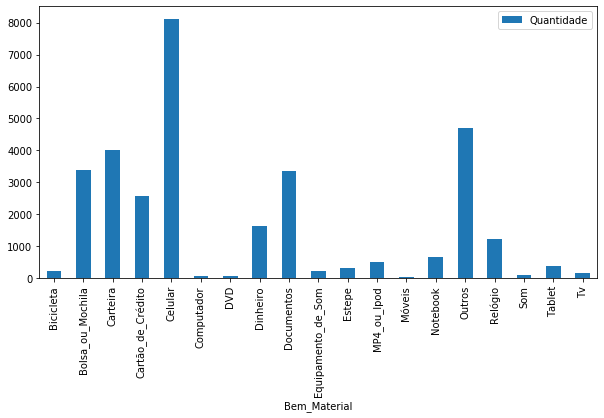

In [131]:
#Plotando gráfico de barras das quantidades de cada entrada no dataframe criado
dados.plot(kind='bar', x= 'Bem_Material', y='Quantidade', figsize=(10,5));

## Qual a porcentagem de vitimas que registram B.O?

In [0]:
#Contando valores da variável "registrou_bo"
df_clean.registrou_bo.value_counts()

True     6726
False    4977
Name: registrou_bo, dtype: int64

In [0]:
#Gerando valor de porcentagem de True da variável "registrou_bo"
porc_registro = ( df_clean[df_clean.registrou_bo == True].shape[0] / df_clean.registrou_bo.shape[0])

print('O numero de pessoas que registraram o B.O foram de {:.2%}'.format(porc_registro))

O numero de pessoas que registraram o B.O foram de 55.17%


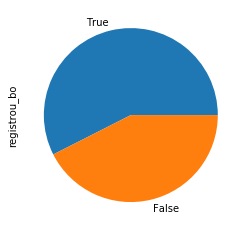

In [0]:
#Plotando gráfico de pizza dos valores dentro da variável "registrou_bo"
df_clean['registrou_bo'].value_counts().plot.pie();

## Qual o valor dos prejuizos por mês?

In [0]:
#Somando valores da coluna valor_prejuizo
df_clean.valor_prejuizo.sum()

15289267.976

R$ 15.289.267,97 de prejuizos com os crimes.

## Qual o sexo das vitimas?

O dataset não informada qual sexo era representado por 0 ou 1, ao analisar algumas descrições pude concluir que 0 está relacionado ao sexo feminino e 1 ao sexo masculino:

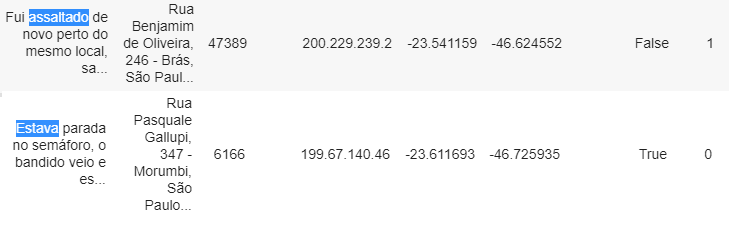


In [142]:
df_clean.sexo.value_counts()

1    7384
0    4808
Name: sexo, dtype: int64

In [143]:
#Verificando a quantidade de valores 0 e 1 dentro da variável sexo
df_clean.sexo.value_counts(1)

1    0.605643
0    0.394357
Name: sexo, dtype: float64

 1 = Masculino
 2 = Feminino


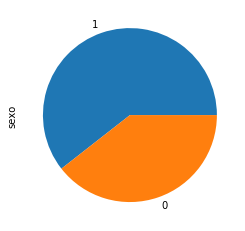

In [145]:
#Plotando gráfico de pizza dos valores 0 e 1 da variável sexo
df_clean['sexo'].value_counts().plot.pie();
print(' 1 = Masculino\n 2 = Feminino')

## Quais as palavras mais utilizadas para relatar os crimes?

In [0]:
#Exemplos de descrições de crimes
display(df_clean.descricao.iloc[100])
display(df_clean.descricao.iloc[150])
display(df_clean.descricao.iloc[200])

'Deixamos as duas bicicletas no bicicletario do mercado, presas com cadeado, bem proximo de uma viatura com vigias do mercado. Ao sair as bicicletas tinham sumido.'

'Parei em frente a minha casa para apenas entrar e tomar um café, pois tinha que sair novamente. Demorei 20 minutos e ao sair deparei com meu veículo arrombado.'

'Fui assaltado ao voltar na faculdade, quase em frente a uma escola, 3 jovens aparentemente da mesma idade, de moletom e boné, 1 estava armado. '

In [0]:
#Transformar coluna descricao em string
df_clean.descricao = str(df_clean.descricao)

#Concatenar as palavras
all_descricao = " ".join(s for s in df_clean.descricao)

#Ver quantidade de palavras
print('Quantidade de palavras: {}'.format(len(all_descricao)))

Quantidade de palavras: 8473439


In [0]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "foi", "para", "caso"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color = "black", width=1600, height=800).generate(all_descricao)

wordcloud.to_file('descricoes.png');

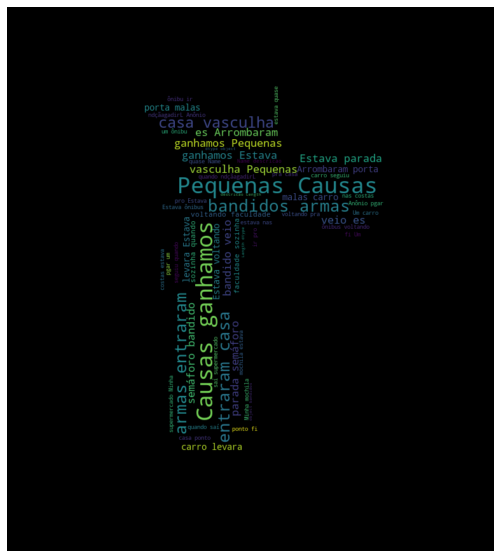

In [152]:
#Criar uma WordCloud sobre uma imagem
# endereço LOCAL da SUA imagem
sp_mask = np.array(Image.open("/content/planeje_mapadacidade.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=sp_mask, max_font_size=200,
                      min_font_size=1).generate(all_descricao)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

wordcloud.to_file("descricoes.png");

# Conclusão

## **Conclusão sobre a análise**
Iniciamos a análise com um dataset composto por 36 variáveis e 12899 entradas, an analisar as primeiras entradas, tive que analisar alguns comentários para identificar o que significava alguns dados dentro das variáveis, como o sexo por exemplo.

Para não ter problema com com nomes das variáveis dentro do Python, alterei alguns nomes colocando "_" no lugar de espaços em branco.
Retirar valores outliers foi um grande desafio quando se trata de prejuizos de pessoas em um crime, então mantive alguns outliers mantendo-os no dataset.
Realizei algumas buscas na internet mas infelizmente não encontrei nada que me indicasse o significado dos valores numéricos dentro da variável "ipo_assalto_id".

Devido aos bens materiais envolvidos em crimes estarem em forma de variável, criei um Data Frame simplificando a informação.

## **Conclusão referente as informações extraidas do dataset**
Analisando os bairros com maior índice de crimes encontramos 12,58% de dados nulos, e 5,72% como "São Paulo", o que provavelmente o input dos dados foi de maneira erronea, dos demais temos Consolação, Vila Mariana, Bela Vista, Pinheiros e Ipiranga.

Os item mais envolvidos no crime é o celular, seguido por outros não descriminados, carteiras, documentos, bolsas e mochilas, e etc.

O valor dos prejuizos no período de 8 anos foi de R$15.289.267,98.

O tipo de sexo mais envolvido é o Masculino com 65,56% 